In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import load

from modules.sink.data_types import CombinedSinkData
from modules.sink.rates_and_tscales import t_rms_mach_near_end,mdotB,tBH_to_tBHA
from modules.sink.stats import steady_state_test_rw_to_end

/Users/kaylan1/miniconda3/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def process_sink(fn,str_beta):
    fin=open(fn,'r')
    master_sink=load(fin)
    fin.close()
    #corr mdots 
    end_t,end_mach= t_rms_mach_near_end(str_beta)
    master_sink.rm_mdot_systematics(end_t,end_mach)
    return master_sink

str_betas=['bInf','bInfsd3','b100','b10','b1','b1e-1','b1e-2']
fns=['data/processed/bInf_sd2/lev5/master_sink_bInf.pickle',\
     'data/processed/bInf_sd3/lev5/master_sink_bInfsd3.pickle',\
     'data/processed/b100_sd2/lev4/master_sink_b100.pickle',\
     'data/processed/b10_sd2/lev4/master_sink_b10.pickle',\
     'data/processed/b1_sd2/lev5/master_sink_b1.pickle',\
     'data/processed/b0.1_sd2/lev5/master_sink_b1e-1.pickle',\
     'data/processed/b0.01_sd2/lev5/master_sink_b1e-2.pickle']
sink={}
for fn,str_beta in zip(fns,str_betas): sink[str_beta]= process_sink(fn,str_beta)

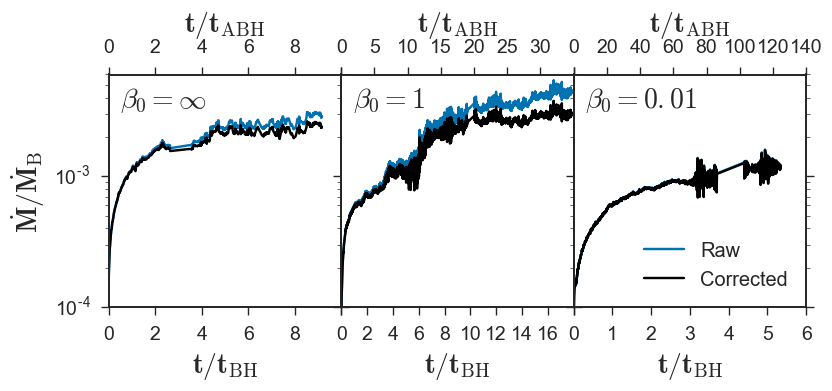

In [12]:
def rm_last_ticklabel(ax):
    labels=ax.get_xticks().tolist()
    labels=np.array(labels).astype(int) #prevent from making float
    labels=list(labels)
    labels[-1]=''
    ax.set_xticklabels(labels)

FS=14
dFS=FS+6
    
#set seaborn panel styles
sns.set_style('ticks') #,{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
c1='k' #sns.color_palette()[0] #'b'
c2=sns.color_palette()[0] #'b'
#kwargs
laba=dict(fontweight='bold',fontsize=dFS)
kwargs_axtext=dict(fontweight='bold',fontsize=FS,va='top',ha='left')
mytext=dict(fontweight='bold',fontsize=dFS,va='top',ha='left')
#setup plot
fig,ax=plt.subplots(1,3,figsize=(9,3),sharey=True)
plt.subplots_adjust(wspace=0)
#
addtext={}
addtext['bInf']=r'$\mathbf{ \beta_0 = \infty }$'
addtext['b1']= r'$\mathbf{ \beta_0 = 1 }$'
addtext['b1e-2']=r'$\mathbf{ \beta_0 = 0.01 }$'
#plot lines
str_betas=['bInf','b1','b1e-2']
ax2={}
for cnt,str_beta in zip(range(3),str_betas):
    ax[cnt].plot(sink[str_beta].tnorm(),np.median(sink[str_beta].mdot,axis=0)/mdotB(),c=c2,label='Raw')
    ax[cnt].plot(sink[str_beta].tnorm(),np.median(sink[str_beta].mdot_vcorr,axis=0)/mdotB(),c=c1,label='Corrected')
    #2nd axis
    ax2[cnt] = ax[cnt].twiny()
    ax2[cnt].set_xlabel(r'$\mathbf{ t/t_{\rm{ABH}} }$',**laba)
    ax2[cnt].plot(tBH_to_tBHA(sink[str_beta].tnorm(),str_beta),np.median(sink[str_beta].mdot_vcorr,axis=0)/mdotB(),visible=False)
    #add text
    ax[cnt].text(0.05,0.95,addtext[str_beta],transform=ax[cnt].transAxes,**mytext)
    #rm overlapping ticks  
    if cnt < 2:
        rm_last_ticklabel(ax[cnt])
        rm_last_ticklabel(ax2[cnt])
#label
for i in range(3): 
    xlab= ax[i].set_xlabel(r'$\mathbf{ t/t_{\rm{BH}} }$',**laba)
    ax[i].set_yscale('log')
    ax[i].set_ylim(1e-4,6e-3)
    ax[i].tick_params(axis='both', which='major', labelsize=FS)
    ax2[i].tick_params(axis='both', which='major', labelsize=FS)
ylab= ax[0].set_ylabel(r'$\mathbf{\dot{M}/\dot{M}_{\rm{B}} }$',**laba)
ax[2].legend(loc=4,fontsize='large')
#save
plt.savefig('raw_corrected.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)

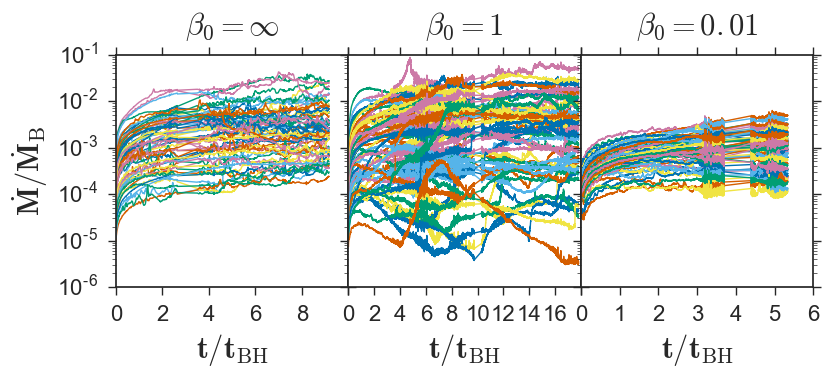

In [17]:
FS=16
dFS=FS+6

#set seaborn panel styles
sns.set()
sns.set_style('ticks') #,{"axes.facecolor": ".97"})
# sns.set_context("paper")
sns.set_palette('colorblind')
#kwargs

laba=dict(fontweight='bold',fontsize=dFS)
kwargs_axtext=dict(fontweight='bold',fontsize=FS,va='bottom',ha='center')
mytext=dict(fontweight='bold',fontsize=dFS,va='bottom',ha='center')
#setup plot
fig,ax=plt.subplots(1,3,figsize=(9,3),sharey=True)
plt.subplots_adjust(wspace=0)
#
addtext={}
addtext['bInf']=r'$\mathbf{ \beta_0 = \infty }$'
addtext['b1']= r'$\mathbf{ \beta_0 = 1 }$'
addtext['b1e-2']=r'$\mathbf{ \beta_0 = 0.01 }$'
#plot lines
str_betas=['bInf','b1','b1e-2']
# beta=1 sink ids with vr/vafast <= -1 at least once in 3 rBH 
# id_outlier= [2,9,11,17,37,43,52,63]
##
for cnt,str_beta in zip(range(3),str_betas):
    for i in range(64):
#         if i in id_outlier:
        ax[cnt].plot(sink[str_beta].tnorm(),sink[str_beta].mdot_vcorr[i,:]/mdotB(),lw=1)
    #add text
    title=ax[cnt].text(0.5,1.05,addtext[str_beta],transform=ax[cnt].transAxes,**mytext)
#     ax[cnt].set_title(addtext[str_beta],**laba)
    #rm overlapping ticks  
    if cnt < 2:
        rm_last_ticklabel(ax[cnt])
#label
for i in range(3): 
    xlab= ax[i].set_xlabel(r'$\mathbf{ t/t_{\rm{BH}} }$',**laba)
    ax[i].set_yscale('log')
    ax[i].set_ylim(1e-6,1e-1)
    ax[i].tick_params(axis='both', which='major', labelsize=FS)
ylab= ax[0].set_ylabel(r'$\mathbf{\dot{M}/\dot{M}_{\rm{B}} }$',**laba)
ax[2].legend(loc=4,fontsize='small')
#save
# sns.despine(top=True,right=False)
plt.savefig('all_rates_fast.png', bbox_extra_artists=[xlab,ylab,title], bbox_inches='tight',dpi=150)

In [12]:
m=5.
mbh=(1+m**4)**(1./3)/(1+(m/1.12)**2)**(1./6)
np.log10(1./mbh**3)

-2.1361913070460612

In [22]:
sns.set_palette('colorblind')
sns.color_palette()

[(0.0, 0.4470588235294118, 0.6980392156862745),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

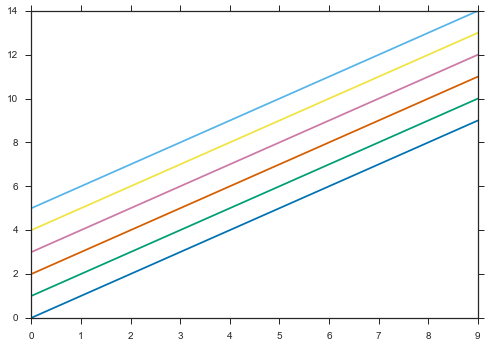

In [18]:
for cnt,c in enumerate(sns.color_palette()): plt.plot(np.arange(10)+cnt,c=c)

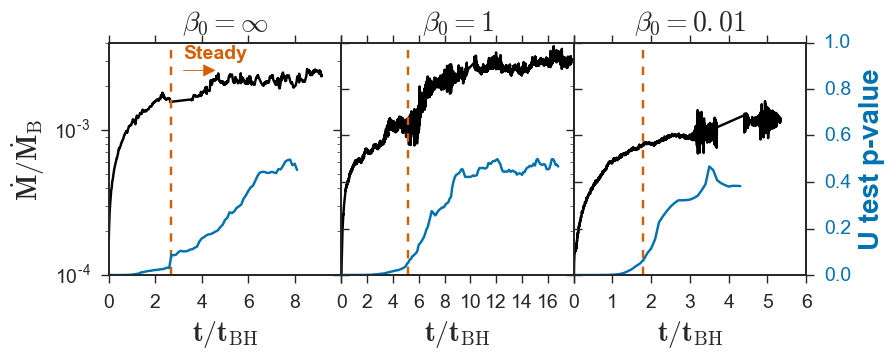

In [20]:
FS=14
dFS=FS+6

#set seaborn panel styles
sns.set_style('ticks')#,{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
c1='k' #mdot
c2=sns.color_palette()[0] #p-value 'b'
c3= sns.color_palette()[2] #steady state line 'r'
#kwargs
laba=dict(fontweight='bold',fontsize=dFS)
kwargs_axtext=dict(fontweight='bold',fontsize=FS)
mytext=dict(fontweight='bold',fontsize=dFS,ha='center')
#setup plot
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0)
#
addtext={}
addtext['bInf']=r'$\mathbf{ \beta_0 = \infty }$'
addtext['b1']= r'$\mathbf{ \beta_0 = 1 }$'
addtext['b1e-2']=r'$\mathbf{ \beta_0 = 0.01 }$'
#plot lines
str_betas=['bInf','b1','b1e-2']
for cnt,str_beta in zip(range(3),str_betas):
    #plot mdot
    ax[cnt].plot(sink[str_beta].tnorm(),np.median(sink[str_beta].mdot_vcorr,axis=0)/mdotB(),c=c1)
    #plot U test probability on 2nd axis
    ax2 = ax[cnt].twinx()
    time_LHS,welch,ks,U= steady_state_test_rw_to_end(sink[str_beta],corr=True)
    ax2.plot(time_LHS,U['p'],c=c2)
    #plot vertical line
    index= np.where(U['p'] >= 0.05)[0][0]
    ax[cnt].plot([time_LHS[index]]*2,[1e-4,4e-3],c=c3,ls='--')
    if cnt == 0: #label vert line
        index= np.where(U['p'] < 0.05)[0][-1]
        ax[cnt].text(time_LHS[index]/time_LHS[-1],0.93,'Steady',color=c3,transform=ax[cnt].transAxes,**kwargs_axtext)
        ax[cnt].arrow(time_LHS[index]/time_LHS[-1], 0.88, (time_LHS[index+7]-time_LHS[index])/time_LHS[-1], 0., head_width=0.05, head_length=0.05, fc=c3, ec=c3,transform=ax[cnt].transAxes)
    #label 2nd axis and match color
    if cnt == 2: ylab= ax2.set_ylabel("U test p-value",color=c2,**laba)
    for tl in ax2.get_yticklabels():
        tl.set_color(c2)
    ax2.set_ylim(0,1)
    #add text
    kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='bottom',ha='center')
    title=ax[cnt].text(0.5,1.05,addtext[str_beta],transform=ax[cnt].transAxes,**mytext)
    #rm overlapping ticks  
    if cnt < 2:
        rm_last_ticklabel(ax[cnt])
    #hide ytick labels
    if cnt < 2: ax2.set_yticklabels([])
#label
ylab= ax[0].set_ylabel(r'$\mathbf{\dot{M}/\dot{M}_{\rm{B}} }$',**laba)
for i in range(3): 
    ax[i].set_ylim(1e-4,4e-3)
    xlab= ax[i].set_xlabel(r'$\mathbf{ t/t_{\rm{BH}} }$',**laba)
    ax[i].set_yscale('log')
    if i > 0: ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='major', labelsize=FS)
ax2.tick_params(axis='both', which='major', labelsize=FS)
# sns.despine(top=True,right=False)
#save
plt.savefig('when_equil.png', bbox_extra_artists=[xlab,ylab,title], bbox_inches='tight',dpi=150)

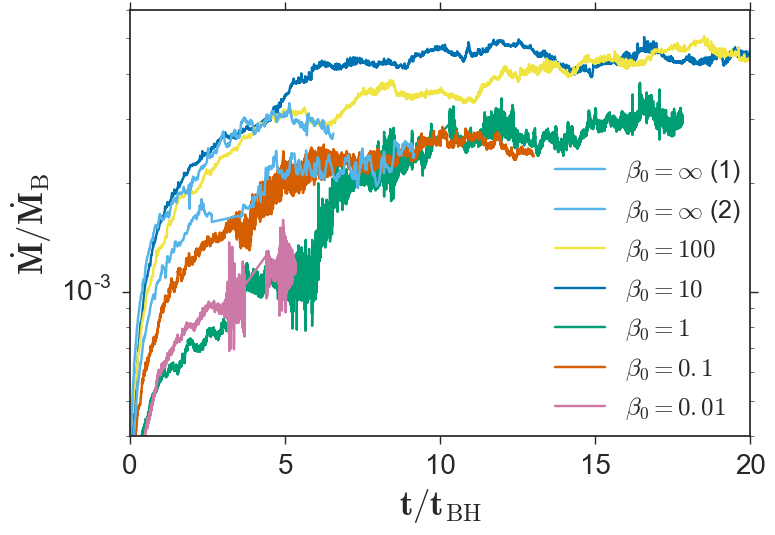

In [31]:
FS=20
dFS=FS+5

#set seaborn panel styles
sns.set_style('ticks') #,{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
# c1='b' #sns.color_palette()[0]
# c2='k' #sns.color_palette()[1]
#kwargs
laba=dict(fontweight='bold',fontsize=dFS)
kwargs_axtext=dict(fontweight='bold',fontsize=FS,va='top',ha='left')
#setup plot
fig,ax=plt.subplots()
#
addtext={}
addtext['bInf']=r'$\mathbf{ \beta_0 = \infty }$ (1)'
addtext['bInfsd3']=r'$\mathbf{ \beta_0 = \infty }$ (2)'
addtext['b100']=r'$\mathbf{ \beta_0 = 100 }$'
addtext['b10']=r'$\mathbf{ \beta_0 = 10 }$'
addtext['b1']= r'$\mathbf{ \beta_0 = 1 }$'
addtext['b1e-1']= r'$\mathbf{ \beta_0 = 0.1 }$'
addtext['b1e-2']=r'$\mathbf{ \beta_0 = 0.01 }$'
#plot lines
str_betas=['b10','b1','b1e-1','b1e-2','b100','bInf','bInfsd3']
for cnt,str_beta in enumerate(str_betas):
    if str_beta == 'bInfsd3': 
        ax.plot(sink[str_beta].tnorm(),np.median(sink[str_beta].mdot_vcorr,axis=0)/mdotB(),c=sns.color_palette()[-1],ls='-',label=addtext[str_beta])
    else: ax.plot(sink[str_beta].tnorm(),np.median(sink[str_beta].mdot_vcorr,axis=0)/mdotB(),label=addtext[str_beta])
#label
xlab= ax.set_xlabel(r'$\mathbf{ t/t_{\rm{BH}} }$',**laba)
ylab= ax.set_ylabel(r'$\mathbf{\dot{M}/\dot{M}_{\rm{B}} }$',**laba)
plt.tick_params(axis='both', which='major', labelsize='large')
ax.set_yscale('log')
ax.set_ylim(4e-4,6e-3)
ax.set_xlim(0,20)
# ax.legend(loc=(0.8,0.01),fontsize=FS)
ax.tick_params(axis='both', which='major', labelsize=FS)
#reorder legend
handles, labels = ax.get_legend_handles_labels()
handles= handles[-2:]+[handles[-3]]+handles[:-3]
labels= labels[-2:]+[labels[-3]]+labels[:-3]
ax.legend(handles, labels,loc=(0.67,0.01),fontsize=FS-2)
#remove top and right axis lines
# sns.despine()
#save
plt.savefig('all_median_curves.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)

In [7]:
plt.figure?

(1, 10)

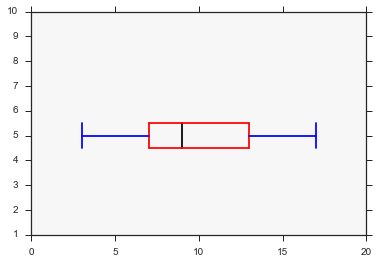

In [144]:
def box_and_whisker(ax, med,sem,std,boxw=0.5):
    sem_low,sem_hi= sem
    std_low,std_hi= std
    #std error med box
    ax.plot([med]*2,[yloc-boxw,yloc+boxw],c='k')
    ax.plot([med-sem_low]*2,[yloc-boxw,yloc+boxw],c='r')
    ax.plot([med+sem_hi]*2,[yloc-boxw,yloc+boxw],c='r')
    ax.plot([med-sem_low,med+sem_hi],[yloc-boxw]*2,c='r')
    ax.plot([med-sem_low,med+sem_hi],[yloc+boxw]*2,c='r')
    #pdf std dev
    ax.plot([med-std_low,med-sem_low],[yloc]*2,c='b')
    ax.plot([med+sem_hi,med+std_hi],[yloc]*2,c='b')
    ax.plot([med-std_low]*2,[yloc-boxw,yloc+boxw],c='b')
    ax.plot([med+std_hi]*2,[yloc-boxw,yloc+boxw],c='b')

med=9
sem_low,sem_hi=2,4
std_low,std_hi=6,8
yloc=5
#    
fig,ax=plt.subplots()
box_and_whisker(ax, med,(sem_low,sem_hi),(std_low,std_hi),boxw=0.5)
ax.set_xlim(0,20)
ax.set_ylim(1,10)

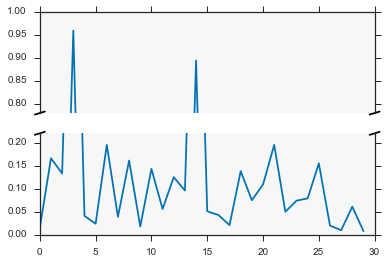

In [150]:
# 30 points between 0 0.2] originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

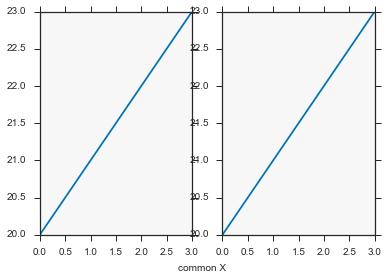

In [172]:
fig,ax=plt.subplots(1,2)
x = np.array([0,1,2,3])
y = np.array([20,21,22,23])
# my_xticks = ['John','Arnold','Mavis','Matt']
ax[0].plot(x, y)
ax[1].plot(x,y)
fig.text(0.5, 0., 'common X', ha='center')
# labels=ax.get_xticks().tolist()
# labels=np.array(labels).astype(str)
# labels[:]=''
# labels[-1]= r'$\mathbf{ \infty }$'
# ax.set_xticklabels(labels)
# ax.set_yticks([])




In [9]:
np.loadtxt?

In [2]:
import yt

In [9]:
from modules.hdf5_params.rms_values import yt_prim_vars

cube= ds.covering_grid(level=0,left_edge=ds.domain_left_edge,\
                        dims=ds.domain_dimensions)
data= yt_prim_vars(cube, more_fields=['dx','dy','dz'])

In [11]:
data['vx'].shape

(32768,)

yt : [INFO     ] 2016-07-16 08:08:07,545 xlim = -2800000000000000000.000000 2800000000000000000.000000
yt : [INFO     ] 2016-07-16 08:08:07,546 ylim = -2800000000000000000.000000 2800000000000000000.000000
yt : [INFO     ] 2016-07-16 08:08:07,554 xlim = -2800000000000000000.000000 2800000000000000000.000000
yt : [INFO     ] 2016-07-16 08:08:07,555 ylim = -2800000000000000000.000000 2800000000000000000.000000
yt : [INFO     ] 2016-07-16 08:08:07,559 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



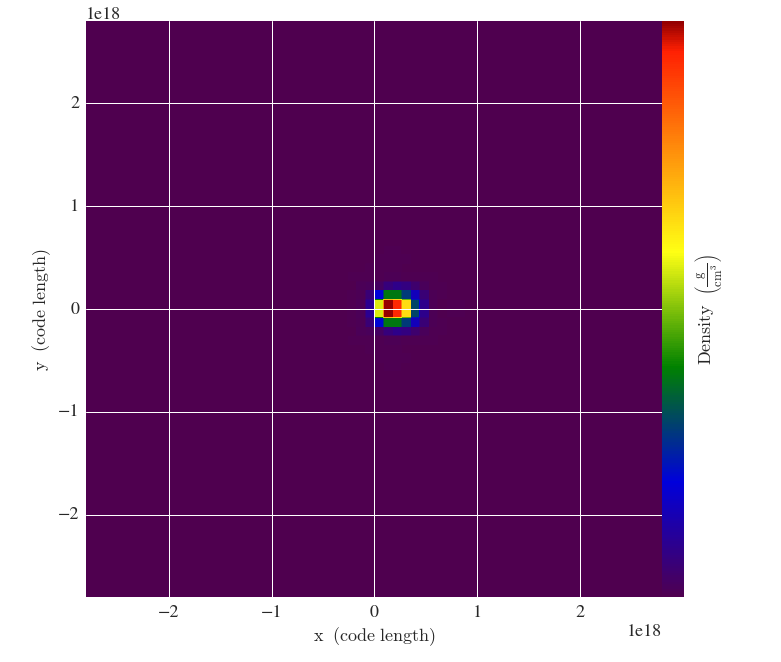

In [6]:


# Create density slices in all three axes.
yt.SlicePlot(ds, 'z', "density",width = ds.domain_width)



# Radial velocity plots

In [69]:
import yt
from yt.fields.api import ValidateParameter
import numpy as np

# Define new fields
def _my_vx(field, data):
    return data['X-momentum']/data['density']
def _my_vy(field, data):
    return data['Y-momentum']/data['density']
def _my_vz(field, data):
    return data['Z-momentum']/data['density']

def _my_radius(field,data):
    if data.has_field_parameter("center"):
        center= data.get_field_parameter("center").in_units("cm")
    else:
        raise ValueError
    x_hat = data["x"] - center[0]
    y_hat = data["y"] - center[1]
    z_hat = data["z"] - center[2]
    return np.sqrt(x_hat*x_hat+y_hat*y_hat+z_hat*z_hat)


def _my_radial_velocity(field, data):
    if data.has_field_parameter("bulk_velocity") and \
       data.has_field_parameter("center"):
        bv = data.get_field_parameter("bulk_velocity").in_units("cm/s")
        center= data.get_field_parameter("center").in_units("cm")
    else:
        raise ValueError #bv = data.ds.arr(np.zeros(3), "cm/s")
    xv = data["my_vx"] - bv[0]
    yv = data["my_vy"] - bv[1]
    zv = data["my_vz"]- bv[2]
    #center = data.get_field_parameter('center')
    #x_hat = data["x"] - center[0]
    #y_hat = data["y"] - center[1]
    #z_hat = data["z"] - center[2]
    #r = np.sqrt(x_hat*x_hat+y_hat*y_hat+z_hat*z_hat)
    r= data['my_radius']
    x_hat /= r
    y_hat /= r
    z_hat /= r
    return xv*x_hat + yv*y_hat + zv*z_hat
# Autotmatically add fields to all subsequent data loads
yt.add_field("my_vx",function=_my_vx,units='cm/s')
yt.add_field("my_vy",function=_my_vy,units='cm/s')
yt.add_field("my_vz",function=_my_vz,units='cm/s')
yt.add_field("my_radius",
             function=_my_radius,
             units="cm",
             take_log=False,
             validators=[ValidateParameter('center')])
yt.add_field("my_radial_velocity",
             function=_my_radial_velocity,
             units="cm/s",
             take_log=False,
             validators=[ValidateParameter('center'),
                         ValidateParameter('bulk_velocity')])

# SET REQUIRED PARAMS
ds = yt.load("data/data.0006.3d.hdf5")
# get a test sphere
rad=10*np.array(ds.domain_width/ds.domain_dimensions)[0]
sp.set_field_parameter("center", yt.YTArray([0.,0.,0.], "cm"))
bv=np.zeros(3)
for i,comp in enumerate(['x','y','z']):
    bv[i]= np.average(sp['my_v'+comp])
sp.set_field_parameter("bulk_velocity", yt.YTArray(bv, "cm/s"))


# # data within radius 1 dx cell about center
# c=[0,0,0]
# rad=np.array(ds.domain_width/ds.domain_dimensions)[0]
# sp = ds.sphere(c, rad)


# # data within radius 10 cells about center
# rad=10*np.array(ds.domain_width/ds.domain_dimensions)[0]
# sp = ds.sphere(c, rad)             
# sp.set_field_parameter("bulk_velocity", yt.YTArray(bv, "cm/s"))
# sp['my_radial_velocity'].shape, sp['x'].shape

yt : [WARNING  ] 2016-07-16 09:52:34,289 Field ('gas', 'my_vx') already exists. To override use force_override=True.
yt : [WARNING  ] 2016-07-16 09:52:34,291 Field ('gas', 'my_vy') already exists. To override use force_override=True.
yt : [WARNING  ] 2016-07-16 09:52:34,293 Field ('gas', 'my_vz') already exists. To override use force_override=True.
yt : [WARNING  ] 2016-07-16 09:52:34,295 Field ('gas', 'my_radius') already exists. To override use force_override=True.
yt : [WARNING  ] 2016-07-16 09:52:34,297 Field ('gas', 'my_radial_velocity') already exists. To override use force_override=True.


In [60]:
ds.field_info

{'my_radial_velocity': <yt.fields.derived_field.DerivedField at 0x11ae70810>,
 'my_vx': <yt.fields.derived_field.DerivedField at 0x11af53a90>,
 'my_vy': <yt.fields.derived_field.DerivedField at 0x11af53e10>,
 'my_vz': <yt.fields.derived_field.DerivedField at 0x11b1dd550>,
 ('chombo',
  u'X-magnfield'): <yt.fields.derived_field.DerivedField at 0x1131d9c90>,
 ('chombo',
  u'X-momentum'): <yt.fields.derived_field.DerivedField at 0x1131d9cd0>,
 ('chombo',
  u'Y-magnfield'): <yt.fields.derived_field.DerivedField at 0x1131d9fd0>,
 ('chombo',
  u'Y-momentum'): <yt.fields.derived_field.DerivedField at 0x113024a50>,
 ('chombo',
  u'Z-magnfield'): <yt.fields.derived_field.DerivedField at 0x113024f10>,
 ('chombo',
  u'Z-momentum'): <yt.fields.derived_field.DerivedField at 0x112b89350>,
 ('chombo', u'density'): <yt.fields.derived_field.DerivedField at 0x112b89750>,
 ('chombo',
  u'energy-density'): <yt.fields.derived_field.DerivedField at 0x112b89bd0>,
 ('gas',
  'H_nuclei_density'): <yt.fields.de

In [59]:
# Create a 1D profile object for profiles over radius
# and add a velocity profile.
rad_max= 5*np.array(ds.domain_width/ds.domain_dimensions)[0]
prof = yt.create_profile(sp, 'my_radius', 'my_radial_velocity',\
                         units = {'my_radius': 'cm'},\
                         extrema = {'my_radius': ((0, 'cm'), (rad_max, 'cm'))})

# Create arrays to plot.
radius = prof.x.value
# mean = prof['gas', 'velocity_magnitude'].value
rvel= prof.y.value
# variance = prof.variance['gas', 'velocity_magnitude'].value

# Plot the average velocity magnitude.
plt.plot(radius, rvel)
# Plot the variance of the velocity magnitude.
# plt.loglog(radius, variance, label='Standard Deviation')
plt.xlabel('r [cm]')
plt.ylabel('Radial Velocity [cm/s]')
# plt.legend()


YTFieldNotFound: Could not find field '('all', 'my_radius')' in data.0006.3d.hdf5.

In [55]:
width= np.array(ds.domain_width)[0]/10.
yt.SlicePlot(ds, "z", ["my_radial_velocity","density"],width = (width, 'cm'))

yt : [INFO     ] 2016-07-16 09:10:22,809 xlim = -280000000000000000.000000 280000000000000000.000000
yt : [INFO     ] 2016-07-16 09:10:22,810 ylim = -280000000000000000.000000 280000000000000000.000000
yt : [INFO     ] 2016-07-16 09:10:22,818 xlim = -280000000000000000.000000 280000000000000000.000000
yt : [INFO     ] 2016-07-16 09:10:22,819 ylim = -280000000000000000.000000 280000000000000000.000000
yt : [INFO     ] 2016-07-16 09:10:22,822 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2016-07-16 09:10:22,857 Making a fixed resolution buffer of (('index', 'my_radial_velocity')) 800 by 800
yt : [INFO     ] 2016-07-16 09:10:23,927 Making a fixed resolution buffer of (('gas', 'my_radial_velocity')) 800 by 800


KeyError: ('gas', 'my_radial_velocity')

In [15]:
def mach_bh(mach):
    num= (1.+mach**4)**(1./3)
    return num/(1.+(4*mach/np.exp(1.5))**2)**(1./6)

def mdot_par(beta, mach=1,beta_ch=19.8,n=1):
    mbh= mach_bh(mach)
    return (1.+(beta_ch/mbh**2/beta)**(n/2.))**(-1./n)

for beta in [0.0035,0.006]:
    print 'mdot(beta=%.4f)= %.4f' % (beta,mdot_par(beta))

mdot(beta=0.0035)= 0.0150
mdot(beta=0.0060)= 0.0195


In [44]:
# Load the dataset.


# Create a sphere of radius 100 kpc in the center of the box.
my_sphere = ds.sphere("c", ds.domain_width)

# Create a profile of the average density vs. radius.
plot = yt.ProfilePlot(my_sphere, "radius", "density",
                      weight_field="cell_mass")

# Change the units of the radius into kpc (and not the default in cgs)
# plot.set_unit('radius', 'kpc')

# Save the image.
# Optionally, give a string as an argument
# to name files with a keyword.
# plot.save()

AttributeError: 'YTSphere' object has no attribute 'coordinates'

In [25]:
np.array(ds.domain_width/ds.domain_dimensions)[0]

1.75e+17

In [13]:
omega_m=0.31
H0=100*0.676
z=0.35
Hz= H0*np.sqrt(omega_m*(1+z)**3)
#
alpha=1.002
ep=0.022
print Hz,'%.5g' % (Hz/alpha/(ep+1)**(2./3)/1e3,)

59.0375322198 0.058071


In [4]:
import numpy as np
rBH_dx= np.array([64,64,32,32,64,64,64])
two_div_beta= np.array([0.,0.,2./0.44,2./0.16,2./0.075,2./0.099,2./0.0099])
rABH_rBH= (1+25)/(1.+25.+two_div_beta)
print rABH_rBH*rBH_dx

[ 64.          64.          27.23809524  21.61038961  31.59493671
  36.01574115   7.29759901]
